In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns",None)

In [6]:
# df_processed = pd.read_csv("processed.csv")
# del df_processed["Unnamed: 0"]
# df_processed.head(10)

,id,description,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,availability_60,number_of_reviews,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month,room_type#Entire home/apt,room_type#Hotel room,room_type#Private room,room_type#Shared room,amenities_percent,neighbourhood_cleansed#Battery Park City,neighbourhood_cleansed#Central Park,neighbourhood_cleansed#Chelsea,neighbourhood_cleansed#Chinatown,neighbourhood_cleansed#Civic Center,neighbourhood_cleansed#East Harlem,neighbourhood_cleansed#East Village,neighbourhood_cleansed#Ellis Island,neighbourhood_cleansed#Financial District,neighbourhood_cleansed#Flatiron District,neighbourhood_cleansed#Gramercy,neighbourhood_cleansed#Greenwich Village,neighbourhood_cleansed#Harlem,neighbourhood_cleansed#Hell's Kitchen,neighbourhood_cleansed#Inwood,neighbourhood_cleansed#Kips Bay,neighbourhood_cleansed#Little Italy,neighbourhood_cleansed#Lower East Side,neighbourhood_cleansed#Marble Hill,neighbourhood_cleansed#Midtown,neighbourhood_cleansed#Morningside Heights,neighbourhood_cleansed#Murray Hill,neighbourhood_cleansed#NoHo,neighbourhood_cleansed#Nolita,neighbourhood_cleansed#Roosevelt Island,neighbourhood_cleansed#SoHo,neighbourhood_cleansed#Stuyvesant Town,neighbourhood_cleansed#Theater District,neighbourhood_cleansed#Tribeca,neighbourhood_cleansed#Two Bridges,neighbourhood_cleansed#Upper East Side,neighbourhood_cleansed#Upper West Side,neighbourhood_cleansed#Washington Heights,neighbourhood_cleansed#West Village
0,2595,"Beautiful, spacious skylit studio in the heart...",2,0.75,0.23,0,9.0,1,1,1,1.0,1.0,1.0,175.0,30,0,49,78,4.68,3,0.31,1,0,0,0,0.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5178,Please don鈥檛 expect the luxury here just a bas...,3,1.00,1.00,0,1.0,1,0,2,1.0,1.0,1.0,68.0,2,4,550,16,4.23,1,3.39,0,0,1,0,0.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,80493,This room is up three flights of stairs - it's...,4,1.00,0.86,0,1.0,1,1,2,1.5,1.0,2.0,55.0,2,0,207,25,4.34,1,1.49,0,0,1,0,0.60,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45936,<b>The space</b><br />Hi and Thank you for che...,2,0.50,0.86,0,2.0,1,1,2,1.0,1.0,1.0,75.0,31,0,135,58,4.65,1,0.95,0,0,1,0,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5203,"Our best guests are seeking a safe, clean, spa...",1,0.00,0.95,0,5.0,1,1,1,1.0,1.0,1.0,75.0,2,0,118,1874,4.91,1,0.75,0,0,1,0,0.45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,6872,A charming month-to-month home away from home ...,2,1.00,0.14,0,2.0,1,1,1,1.0,1.0,1.0,65.0,30,0,1,94,5.00,2,0.32,0,0,1,0,0.45,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,82638,<b>The space</b><br />If it's an authentic New...,2,1.00,0.37,0,1.0,1,0,2,1.0,1.0,1.0,169.0,30,39,276,183,4.79,1,1.99,1,0,0,0,0.85,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,6990,Beautiful peaceful healthy home<br /><br /><b>...,4,1.00,1.00,0,4.0,1,1,1,1.0,1.0,1.0,62.0,30,29,239,7,4.88,1,1.53,0,0,1,0,0.60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,54466,<b>The space</b><br />NOTE: THIS ROOM WILL NOT...,1,0.00,0.95,0,1.0,1,1,2,1.0,1.0,1.0,200.0,30,60,0,3924,4.81,1,0.00,0,0,1,0,0.50,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,9357,"HELLO. PLEASE DO NOT HIT ""REQUEST TO BOOK"". H...",1,0.00,0.95,0,1.0,1,1,2,1.0,1.0,1.0,175.0,30,0,58,1851,4.52,1,0.37,1,0,0,0,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h5>training, test, and validation set</h5>

In [7]:
from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(df_processed.loc[:,(df_processed.columns!="price")&(df_processed.columns!="id")&(df_processed.columns!="description")],df_processed[["id","price"]],test_size=0.2,random_state=123)
# y_test_copy = y_test.copy()
# y_train_copy = y_train.copy()

# x_train,x_test,y_train,y_test = train_test_split(df_processed.loc[:,(df_processed.columns!="price")&(df_processed.columns!="id")&(df_processed.columns!="description")],df_processed["price"],test_size=0.2,random_state=123)
df_train = pd.read_excel("train_dummy.xlsx")
df_test = pd.read_excel("test_dummy.xlsx")
x_train = df_train.loc[:,(df_train.columns!="price")&(df_train.columns!="id")&(df_train.columns!="description")]
y_train = df_train["price"]
x_test = df_test.loc[:,(df_test.columns!="price")&(df_test.columns!="id")&(df_test.columns!="description")]
y_test = df_test["price"]
del x_train["Unnamed: 0"]
del x_test["Unnamed: 0"]
x_train,x_validation,y_train,y_validation = train_test_split(x_train,y_train,test_size=0.1,random_state=123)
print(x_train.shape,x_validation.shape,x_test.shape)

(10417, 57) (1158, 57) (2879, 57)


In [10]:
x_train.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,room_type#Entire home/apt,room_type#Hotel room,room_type#Private room,room_type#Shared room,neighbourhood_cleansed#Battery Park City,neighbourhood_cleansed#Central Park,neighbourhood_cleansed#Chelsea,neighbourhood_cleansed#Chinatown,neighbourhood_cleansed#Civic Center,neighbourhood_cleansed#East Harlem,neighbourhood_cleansed#East Village,neighbourhood_cleansed#Ellis Island,neighbourhood_cleansed#Financial District,neighbourhood_cleansed#Flatiron District,neighbourhood_cleansed#Gramercy,neighbourhood_cleansed#Greenwich Village,neighbourhood_cleansed#Harlem,neighbourhood_cleansed#Hell's Kitchen,neighbourhood_cleansed#Inwood,neighbourhood_cleansed#Kips Bay,neighbourhood_cleansed#Little Italy,neighbourhood_cleansed#Lower East Side,neighbourhood_cleansed#Marble Hill,neighbourhood_cleansed#Midtown,neighbourhood_cleansed#Morningside Heights,neighbourhood_cleansed#Murray Hill,neighbourhood_cleansed#NoHo,neighbourhood_cleansed#Nolita,neighbourhood_cleansed#Roosevelt Island,neighbourhood_cleansed#SoHo,neighbourhood_cleansed#Stuyvesant Town,neighbourhood_cleansed#Theater District,neighbourhood_cleansed#Tribeca,neighbourhood_cleansed#Two Bridges,neighbourhood_cleansed#Upper East Side,neighbourhood_cleansed#Upper West Side,neighbourhood_cleansed#Washington Heights,neighbourhood_cleansed#West Village,host_response_time,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,availability_60,number_of_reviews,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month,amenities_percent
3872,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.386961,-1.583685,0.409270,-0.231056,-0.521051,-0.318656,-0.445373,-0.593900,0.262854,-0.740483,-0.174909,0.689377,0.064677,-0.345682,-0.337047,-0.438065
7744,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.931763,0.727974,0.637967,-0.227543,-1.123325,11.223756,1.255451,-0.593900,-0.548005,1.260066,-0.447578,2.002985,0.257904,-0.309097,-0.419427,0.285549
1066,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.931763,0.727974,0.272053,-0.226372,-0.521051,-0.318656,-0.445373,-0.593900,-0.492083,0.786252,-0.226034,-0.764310,0.409726,-0.296903,0.029087,1.009162
10311,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.931763,0.727974,0.546488,-0.176020,0.683496,-0.318656,-0.445373,0.480392,-0.548005,1.418004,0.949853,-0.798615,0.271706,-0.321292,1.896366,1.009162
7637,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.931763,0.727974,0.592227,-0.228714,-0.521051,-0.318656,-0.445373,-0.593900,-0.548005,-0.740483,-0.328286,-0.780033,0.326914,-0.333487,0.184693,1.009162


<h4>Standardization on X</h4>

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
# Save mean and std
scaler_mean = scaler.mean_
scaler_std = scaler.scale_

# Standardization
x_train_standard = scaler.transform(x_train)
x_validation_standard = scaler.transform(x_validation)
x_test_standard = scaler.transform(x_test)

<h4>Model Performances</h4>

In [12]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
def model_display_results(model,df_x=x_test_standard,df_y=y_test,plot=True):
    if plot:
        plt.scatter(model.predict(df_x),df_y,marker='.')
        plt.xlabel("Predicted price($)")
        plt.ylabel("Actual Price($)")
    
        # 100% accurate line
        plt.plot(np.linspace(0,1000,100),np.linspace(0,1000,100),'-r')
        plt.show()
    
    # return model result
    return {"MSE":mean_squared_error(df_y,model.predict(df_x)),
            "MAE":mean_absolute_error(df_y,model.predict(df_x)),
            "R2":r2_score(df_y,model.predict(df_x))}

<h4>KNN<br>
Rationale: owners set price according to similar houses.</h4>

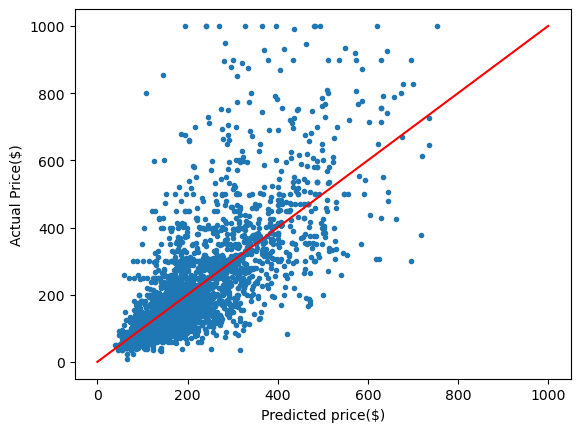

{'MSE': 12784.109749913165, 'MAE': 68.89527613754775, 'R2': 0.5356087184055671}

In [13]:
from sklearn.neighbors import KNeighborsRegressor

# first trial: k=10
knn_10 = KNeighborsRegressor(n_neighbors=10).fit(x_train_standard,y_train.ravel())
model_display_results(knn_10)



In [14]:
# try k=1 to k=50
import tqdm

knn_1_51 = []
scores = pd.DataFrame()
for k in tqdm.tqdm(range(1,51)):
    knn_k = KNeighborsRegressor(n_neighbors=k).fit(x_train_standard,y_train.ravel())
    result_sum = model_display_results(knn_k,x_validation_standard,y_validation,False)
    scores = scores.append(pd.DataFrame([[k,result_sum["MSE"],result_sum["MAE"],result_sum["R2"]]]))
    knn_1_51.append(knn_k)
scores.columns = ["K","MSE","MAE","R2"]


100%|██████████| 50/50 [00:24<00:00,  2.08it/s]


In [15]:
scores.head()

,K,MSE,MAE,R2
0,1,17285.424870,76.450777,0.412398
0,2,15396.189983,74.874784,0.476620
0,3,14589.663500,72.713011,0.504038
0,4,14321.090620,72.179836,0.513168
0,5,14018.872159,71.451986,0.523441


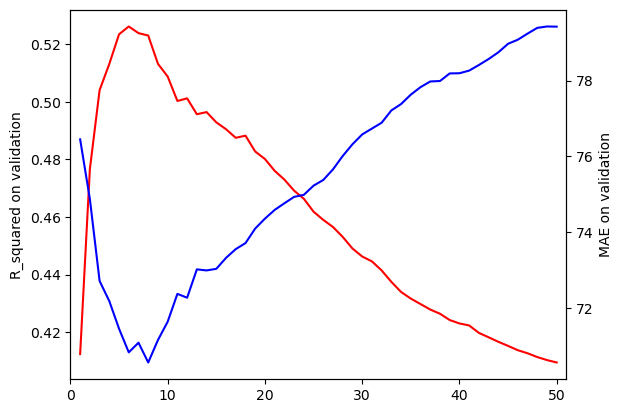

In [16]:
# plot indicators on validation set
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(range(1,51),scores["R2"],color='r')
ax1.set_ylabel("R_squared on validation")
ax2 = ax1.twinx()
ax2.plot(range(1,51),scores["MAE"],color='blue')
ax2.set_xlim([0,51])
ax2.set_ylabel("MAE on validation")
ax2.set_xlabel("K")
plt.show()

<h4>K-fold GridSearch</h4>

In [17]:
from sklearn.model_selection import GridSearchCV
gs_knn = GridSearchCV(KNeighborsRegressor(),
                      param_grid={"n_neighbors":range(1,31),"weights":["uniform","distance"],"p":[1,2]},
                      scoring="r2",
                      cv=5)
gs_knn.fit(np.concatenate((x_train_standard,x_validation_standard),axis=0),
           np.concatenate((y_train,y_validation),axis=0))

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 31), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [18]:
# Gridsearch results for best knn model
knn_best = gs_knn.best_estimator_
gs_knn.best_params_

{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [19]:
str(knn_best)

"KNeighborsRegressor(n_neighbors=9, p=1, weights='distance')"

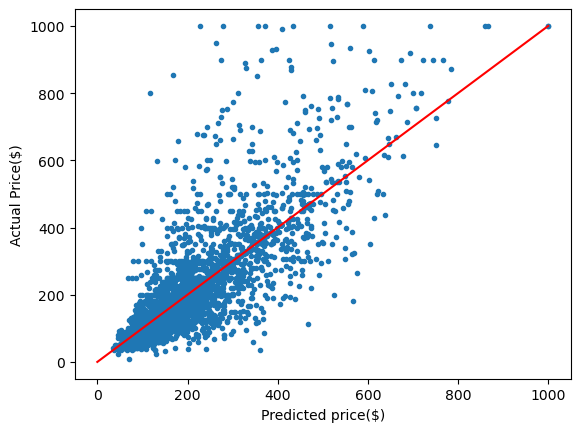

{'MSE': 10671.144244311776, 'MAE': 61.53612620107366, 'R2': 0.6123635944435895}

In [20]:
# best model's accuracy
model_display_results(knn_best)

In [21]:
knn_best.predict(x_test_standard)

array([259.2438308 ,  92.06031014, 316.30582223, ..., 161.24258169,
       177.44386159,  80.25339436])

<h4>Visualization</h4>

In [23]:
# visualize how
def regression_summary_graph(model_set,x_col,var_y=y_test,reduced=False,legend=True):
    df_result = pd.DataFrame({x_col:x_test[x_col],"Actual_Price":var_y})
    for model in model_set:
        y_pred = model.predict(x_test_standard)
        df_result[str(model)] = y_pred
    df_sum = df_result.groupby(x_col).mean()
    df_sum = df_sum.sort_values(by=x_col,ascending=True)
    
    # reduce sample size?
    if reduced:
        df_sum = df_sum.iloc[df_sum.index%10==0,]
    
    # plot actual y on x
    %matplotlib inline
    plt.figure(figsize=(12,6))
    plt.title("KNN results for multiple models")
    for i in range(0,df_sum.shape[1]):
        plt.plot(df_sum.index,df_sum.iloc[:,i],label=df_sum.columns[i])
    if legend:
        plt.legend(loc="upper left",fontsize="x-small")
    plt.xlabel(x_col)
    plt.ylabel("Price($)")
    plt.show()
    return None

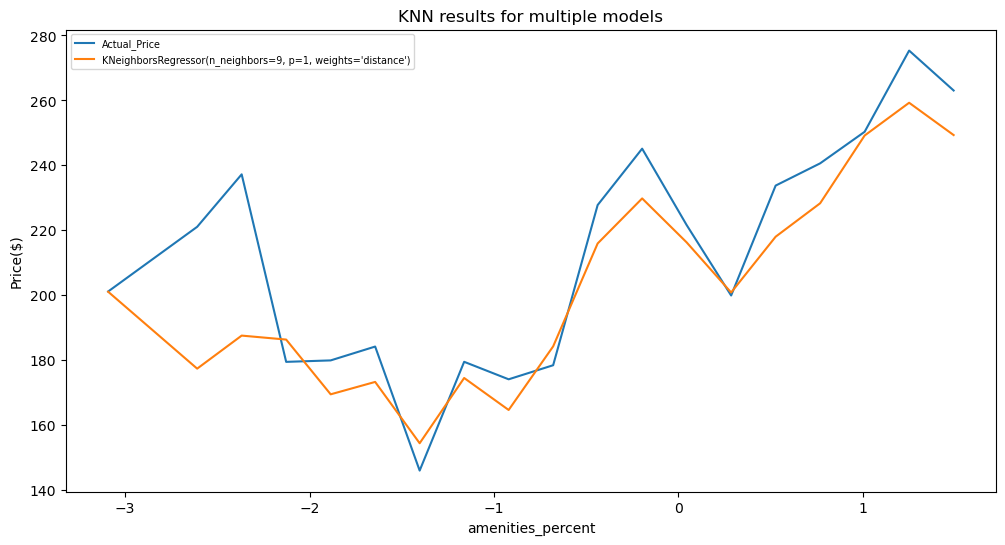

In [24]:
regression_summary_graph([knn_best],"amenities_percent",reduced=False)
# aaa


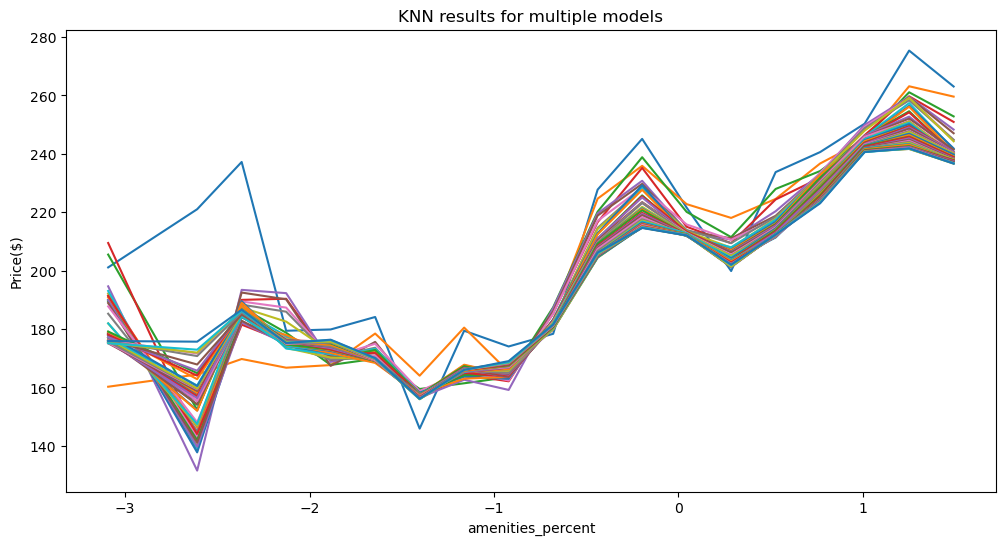

In [25]:
regression_summary_graph(knn_1_51,"amenities_percent",reduced=False,legend=False)

In [26]:
# which houses has 3/20 amenities
x_test[x_test["amenities_percent"]==0.05]

,host_is_superhost,host_has_profile_pic,host_identity_verified,room_type#Entire home/apt,room_type#Hotel room,room_type#Private room,room_type#Shared room,neighbourhood_cleansed#Battery Park City,neighbourhood_cleansed#Central Park,neighbourhood_cleansed#Chelsea,neighbourhood_cleansed#Chinatown,neighbourhood_cleansed#Civic Center,neighbourhood_cleansed#East Harlem,neighbourhood_cleansed#East Village,neighbourhood_cleansed#Ellis Island,neighbourhood_cleansed#Financial District,neighbourhood_cleansed#Flatiron District,neighbourhood_cleansed#Gramercy,neighbourhood_cleansed#Greenwich Village,neighbourhood_cleansed#Harlem,neighbourhood_cleansed#Hell's Kitchen,neighbourhood_cleansed#Inwood,neighbourhood_cleansed#Kips Bay,neighbourhood_cleansed#Little Italy,neighbourhood_cleansed#Lower East Side,neighbourhood_cleansed#Marble Hill,neighbourhood_cleansed#Midtown,neighbourhood_cleansed#Morningside Heights,neighbourhood_cleansed#Murray Hill,neighbourhood_cleansed#NoHo,neighbourhood_cleansed#Nolita,neighbourhood_cleansed#Roosevelt Island,neighbourhood_cleansed#SoHo,neighbourhood_cleansed#Stuyvesant Town,neighbourhood_cleansed#Theater District,neighbourhood_cleansed#Tribeca,neighbourhood_cleansed#Two Bridges,neighbourhood_cleansed#Upper East Side,neighbourhood_cleansed#Upper West Side,neighbourhood_cleansed#Washington Heights,neighbourhood_cleansed#West Village,host_response_time,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,availability_60,number_of_reviews,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month,amenities_percent


<h4> Try to search for better model </h4>

In [ ]:
# pd.DataFrame(x_train_standard,columns=(df_processed.columns)[df_processed.columns!="price"]).describe()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,availability_60,number_of_reviews,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month,neighbourhood_cleansed#Battery Park City,neighbourhood_cleansed#Central Park,neighbourhood_cleansed#Chelsea,neighbourhood_cleansed#Chinatown,neighbourhood_cleansed#Civic Center,neighbourhood_cleansed#East Harlem,neighbourhood_cleansed#East Village,neighbourhood_cleansed#Ellis Island,neighbourhood_cleansed#Financial District,neighbourhood_cleansed#Flatiron District,neighbourhood_cleansed#Gramercy,neighbourhood_cleansed#Greenwich Village,neighbourhood_cleansed#Harlem,neighbourhood_cleansed#Hell's Kitchen,neighbourhood_cleansed#Inwood,neighbourhood_cleansed#Kips Bay,neighbourhood_cleansed#Little Italy,neighbourhood_cleansed#Lower East Side,neighbourhood_cleansed#Marble Hill,neighbourhood_cleansed#Midtown,neighbourhood_cleansed#Morningside Heights,neighbourhood_cleansed#Murray Hill,neighbourhood_cleansed#NoHo,neighbourhood_cleansed#Nolita,neighbourhood_cleansed#Roosevelt Island,neighbourhood_cleansed#SoHo,neighbourhood_cleansed#Stuyvesant Town,neighbourhood_cleansed#Theater District,neighbourhood_cleansed#Tribeca,neighbourhood_cleansed#Two Bridges,neighbourhood_cleansed#Upper East Side,neighbourhood_cleansed#Upper West Side,neighbourhood_cleansed#Washington Heights,neighbourhood_cleansed#West Village,room_type#Entire home/apt,room_type#Hotel room,room_type#Private room,room_type#Shared room,amenities_percent
count,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04,1.040600e+04
mean,6.303924e-16,-2.366399e-17,7.229359e-17,7.881239e-16,-2.261922e-16,-1.219394e-16,-4.871389e-16,-5.637214e-16,7.921782e-16,3.109713e-16,6.661872e-16,1.678137e-16,1.825477e-16,-1.046955e-16,-1.663307e-16,1.736657e-16,-2.610454e-16,-7.713735e-17,1.297793e-15,1.559640e-15,1.212326e-16,2.146976e-15,8.451727e-16,-2.960933e-16,-3.156443e-16,1.122359e-16,-5.193061e-16,-2.688285e-16,7.932264e-16,5.852516e-17,1.054104e-17,-5.573307e-16,-6.788353e-16,1.703829e-15,4.079504e-16,6.897551e-18,4.363055e-16,-2.273578e-17,8.402770e-16,-1.446085e-16,8.105196e-16,1.195522e-15,-2.848227e-16,-1.662561e-15,-5.442517e-16,2.825750e-15,3.389216e-16,-4.238980e-16,-2.249114e-15,-5.327491e-16,2.136320e-16,4.134316e-16,-5.945230e-16,-1.091848e-15,-1.216274e-17,7.638945e-16,-9.972776e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.381296e+00,-1.571306e+00,-3.865995e+00,-4.645387e-01,-2.286321e-01,-1.070618e+01,

In [ ]:
# pd.DataFrame(x_train_standard,columns=(df_processed.columns)[df_processed.columns!="price"]).head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,availability_60,number_of_reviews,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month,neighbourhood_cleansed#Battery Park City,neighbourhood_cleansed#Central Park,neighbourhood_cleansed#Chelsea,neighbourhood_cleansed#Chinatown,neighbourhood_cleansed#Civic Center,neighbourhood_cleansed#East Harlem,neighbourhood_cleansed#East Village,neighbourhood_cleansed#Ellis Island,neighbourhood_cleansed#Financial District,neighbourhood_cleansed#Flatiron District,neighbourhood_cleansed#Gramercy,neighbourhood_cleansed#Greenwich Village,neighbourhood_cleansed#Harlem,neighbourhood_cleansed#Hell's Kitchen,neighbourhood_cleansed#Inwood,neighbourhood_cleansed#Kips Bay,neighbourhood_cleansed#Little Italy,neighbourhood_cleansed#Lower East Side,neighbourhood_cleansed#Marble Hill,neighbourhood_cleansed#Midtown,neighbourhood_cleansed#Morningside Heights,neighbourhood_cleansed#Murray Hill,neighbourhood_cleansed#NoHo,neighbourhood_cleansed#Nolita,neighbourhood_cleansed#Roosevelt Island,neighbourhood_cleansed#SoHo,neighbourhood_cleansed#Stuyvesant Town,neighbourhood_cleansed#Theater District,neighbourhood_cleansed#Tribeca,neighbourhood_cleansed#Two Bridges,neighbourhood_cleansed#Upper East Side,neighbourhood_cleansed#Upper West Side,neighbourhood_cleansed#Washington Heights,neighbourhood_cleansed#West Village,room_type#Entire home/apt,room_type#Hotel room,room_type#Private room,room_type#Shared room,amenities_percent
0,0.932947,0.731397,0.636472,2.152673,-0.226218,0.093404,0.363247,-0.520098,-0.323328,-0.445547,-0.598252,-0.512755,-0.309248,-0.216472,-0.795849,0.520618,-0.317990,0.200641,-0.067358,-0.058093,-0.238712,-0.118875,-0.035367,-0.223246,-0.254714,-0.074214,-0.166897,-0.078045,-0.114646,-0.111154,2.755521,-0.320074,-0.109818,-0.158495,-0.08463,-0.224901,-0.025945,-0.333227,-0.107555,-0.147984,-0.04808,-0.105711,-0.049074,-0.115504,-0.054662,-0.136376,-0.120527,-0.057254,-0.30129,-0.325157,-0.195214,-0.184900,-1.375559,-0.100475,1.450660,-0.117621,-0.180890
1,0.932947,0.731397,0.636472,2.152673,-0.225011,0.093404,0.363247,1.299924,-0.323328,-0.445547,0.492585,0.008977,-0.731813,-0.084860,-0.760118,0.452025,-0.342540,-0.299479,-0.067358,-0.058093,-0.238712,-0.118875,-0.035367,-0.223246,-0.254714,-0.074214,-0.166897,-0.078045,-0.114646,-0.111154,-0.362908,3.124279,-0.109818,-0.158495,-0.08463,-0.224901,-0.025945,-0.333227,-0.107555,-0.147984,-0.04808,-0.105711,-0.049074,-0.115504,-0.054662,-0.136376,-0.120527,-0.057254,-0.30129,-0.325157,-0.195214,-0.184900,0.726977,-0.100475,-0.689341,-0.117621,0.777532
2,-1.381296,-1.571306,-1.344613,-0.464539,-0.227425,0.093404,0.363247,0.086576,-0.323328,-0.445547,-0.598252,0.256114,0.377419,0.211267,-0.773696,-0.727779,-0.342540,-0.279672,-0.067358,-0.058093,-0.238712,-0.118875,-0.035367,-0.223246,-0.254714,-0.074214,-0.166897,-0.078045,-0.114646,-0.111154,2.755521,-0.320074,-0.109818,-0.158495,-0.08463,-0.224901,-0.025945,-0.333227,-0.107555,-0.147984,-0.04808,-0.105711,-0.049074,-0.115504,-0.054662,-0.136376,-0.120527,-0.057254,-0.30129,-0.325157,-0.195214,-0.184900,0.726977,-0.100475,-0.689341,-0.117621,-0.420495
3,-1.381296,-0.650225,0.636472,-0.464539,-0.139319,0.093404,0.363247,-0.520098,-0.323328,-0.445547,-0.598252,-0.540215,-0.731813,-0.430341,1.994723,0.259964,0.393948,-0.448030,-0.067358,-0.058093,-0.238712,-0.118875,-0.035367,-0.223246,-0.254714,-0.074214,-0.166897,-0.078045,-0.114646,-0.111154,-0.362908,-0.320074,-0.109818,-0.158495,-0.08463,-0.224901,-0.025945,-0.333227,-0.107555,-0.147984,-0.04808,-0.105711,-0.049074,-0.115504,-0.054662,7.332695,-0.120527,-0.057254,-0.30129,-0.325157,-0.195214,-0.184900,-1.375559,-0.100475,1.450660,-0.117621,-0.420495
4,-1.381296,-1.571306,0.411349,-0.464539,-0.228632,0.093404,0.363247,-0.520098,-0.323328,-0.445547,-0.598252,1.07990

In [28]:
# reduce dimension: neighborhoods
# knn_exclude_neighbor = KNeighborsRegressor(n_neighbors=3).fit(x_train_standard[:,0:17],y_train.ravel())
# r2_score(knn_exclude_neighbor.predict(x_test_standard[:,0:17]),y_test)

-2.441539803183843